# Comparison of spectrum between eNATL60 outputs and Alitka Satellite 

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 - git clone https://github.com/brodeau/climporn
 
Assumes that time is encoded in datetime64 format in both datasets.

Looks for model months in the longest year of Altika serie

In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_DIR = '/home/jovyan/gonzag_cloud/gonzag' ; # get it there: https://github.com/brodeau/climporn
sys.path.append(GONZAG_DIR)
import gonzag as gz


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_3'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 574, y: 675)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(675, 574), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(675, 574), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(675, 574), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(675, 574), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(675, 574), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(675, 574), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(675, 574), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(675, 574), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(675, 574), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(675, 574), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(675, 574), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 675, 574), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(675, 574), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(675, 574), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(675, 574), meta=np.ndarray>

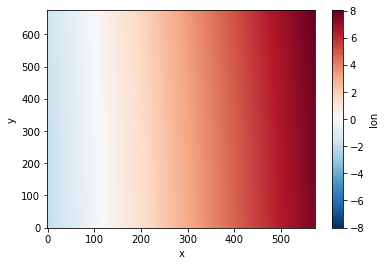

In [5]:
dsmod.lon.plot()

In [13]:
name_mod = 'eNATL60-Region3'
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask'
name_lat_mod = 'lat'
name_lon_mod = 'lon'
l_griddist = False

In [7]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [8]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185 ... 2015...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    ...                        ...
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [9]:
name_sat= 'Altika'
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [10]:
    (date1,date2), (Nts,Ntm) = gz.GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [14]:
  
    ModelGrid = gz.ModGrid( dsmod, date1 , date2 , name_lon_mod, name_lat_mod, dsmod, name_lsm_mod, distorded_grid=False )



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (675, 574)
     * horizontal resolution:  0.016744733  degrees or  1.8605072677135468  km
     * Is this a global domain w.r.t longitude:  True
       ==> East West periodicity:  False , with an overlap of  -1  points
     * lon_min, lon_max =  0.0 360.0
     * lat_min, lat_max =  35.5 43.95
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       ==> time record dates: 2014-02-01 to 2014-04-30, included



In [15]:
lon = ModelGrid.lon

In [16]:
lon.values.min()

5.8912524e-06

In [17]:
lon.values.max()

360.0

In [18]:
mask=ModelGrid.mask

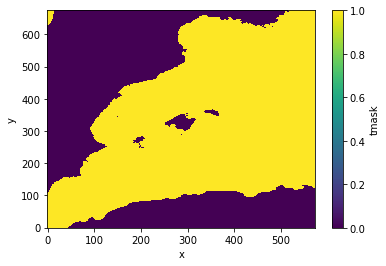

In [19]:
mask.plot()

In [20]:
X=lon

In [21]:
lon.shape

(675, 574)

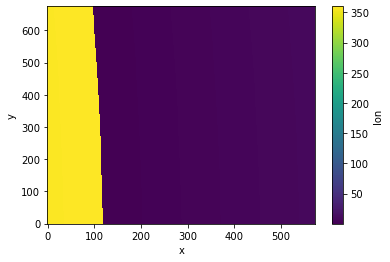

In [22]:
lon.plot()

In [28]:
from sys import exit
from math import radians, cos, sin, asin, sqrt, pi, tan, log, atan2, copysign
import numpy as nmp


In [23]:
dataset=dsmod
varlon=name_lon_mod
varlat=name_lat_mod
gridset=dsmod
varlsm=name_lsm_mod
distorded_grid=False

In [26]:
from gonzag.io import GetTimeVector, GetModelCoor, GetModelLSM, Save2Dfield

In [34]:
        file = dataset

        rvt = GetTimeVector( dataset )
        size = len(rvt)
        time = rvt


        zlat =          GetModelCoor( dataset, 'latitude', varlat )
        zlon = nmp.mod( GetModelCoor( dataset, 'longitude', varlon ) , 360. )
 

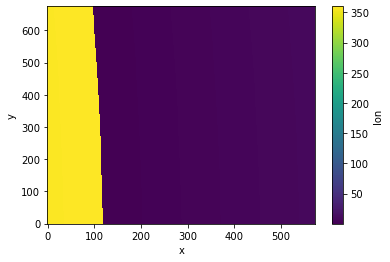

In [35]:
zlon.plot()

In [36]:
lat = zlat
lon = zlon


In [38]:
from gonzag.utils import *

In [39]:
shape = lat.shape
mask = GetModelLSM( gridset, varlsm ) ;
HResDeg = GridResolution( lon )
HResKM  = HResDeg*deg2km
IsLonGlobal, l360, lon_min, lon_max = IsGlobalLongitudeWise( lon, mask=mask , resd=HResDeg)



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 



In [40]:
IsLonGlobal

True

In [41]:
X=lon
resd=HResDeg

In [42]:
    nx   = X.shape[1]
    X    = nmp.mod(X, 360.) ; # no concern, it should already have been done earlier anyway...
    Xm   = nmp.ma.masked_where( mask==0, X    )
    xmin = nmp.amin(Xm) ; # in [0:360] frame...
    xmax = nmp.amax(Xm) ; #     "     "
    imin = nmp.argmin(Xm)%nx
    imax = nmp.argmax(Xm)%nx
    #
    xb = degE_to_degWE(Xm)
    xminB = nmp.amin(xb) ; # in [-180:+180] frame...
    xmaxB = nmp.amax(xb) ; #     "      "
    #
    l360    = True   ; # we'll be in the [0:360] frame...
    lglobal = False


In [43]:
print(xmin)

0.0


In [44]:
print(xmax)

359.99994


In [45]:
1.5*resd

0.025117099285125732

In [ ]:
xmin<1.5*resd and xmax>360.-1.5*resd

In [46]:
xminB

-1.9839783

In [47]:
xmaxB

8.01658

In [48]:
imin

111

In [49]:
imax

116

In [50]:
xminB%360.

358.0160217285156

In [51]:
xmaxB%360.

8.016579627990723

In [52]:
imin = nmp.argmin(Xm)

In [53]:
imin

194697

In [54]:
imax = nmp.argmax(Xm)

In [55]:
imax

87364